In [26]:
from sklearn.cluster import Birch
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances, distance
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances

## BIRCH
### (balanced iterative reducing and clustering using hierarchies)
In most cases, BIRCH only requires a single scan of the database. 

Designed for very large data sets. 

Incremental method that does not require the whole dataset in advanced. 

The algorithm starts with single point clusters. Then it groups the closest points into separate clusters, until only one cluster remains. The algorithm builds a clustering feature tree while scanning the dataset. In clustering it holds number of points in each cluster and center of a clluster. In the next step rebuild the tree so as to each non-leaf node contains at most B (branching factor) entries.

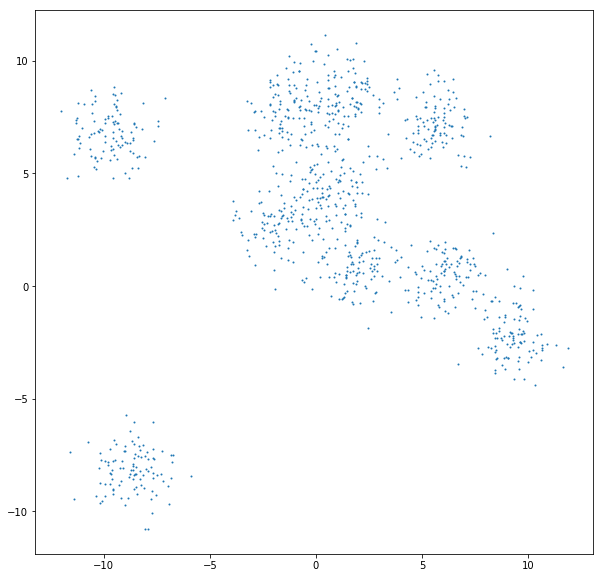

In [6]:
data, labels = make_blobs(1000, centers=10,random_state=0,shuffle=True)
plt.figure(figsize=(10,10))
plt.scatter(data[:,0],data[:,1],s=1)
plt.show()

In [7]:
birch = Birch(threshold=1,branching_factor=50,n_clusters=None)
birch.fit(data)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=None,
   threshold=1)

In [8]:
birch.subcluster_centers_.shape

(40, 2)

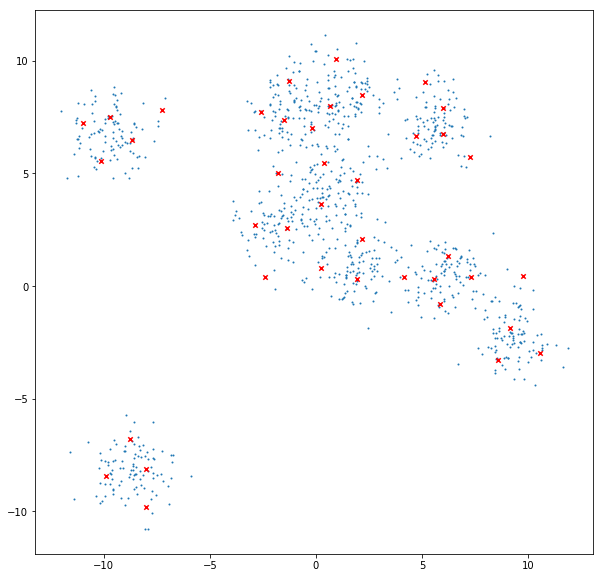

In [9]:
data, labels = make_blobs(1000, centers=10,random_state=0,shuffle=True)
plt.figure(figsize=(10,10))
plt.scatter(data[:,0],data[:,1],s=1)
plt.scatter(birch.subcluster_centers_[:,0],birch.subcluster_centers_[:,1],s=20,c='red',marker='x')
plt.show()

In [10]:
hc = AgglomerativeClustering(n_clusters=10)
hc.fit(birch.subcluster_centers_)

/home/kodolamacz/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=10,
            pooling_func=<function mean at 0x7fd7fde82840>)

In [11]:
Birch(threshold=1,branching_factor=50,n_clusters=10).fit(data)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=10,
   threshold=1)

In [ ]:
knn = KMeans(n_clusters=10)
knn.fit(birch.subcluster_centers_)
# lub
b_knn = Birch(threshold=1,branching_factor=10,n_clusters=KMeans(n_clusters=10)).fit(data)

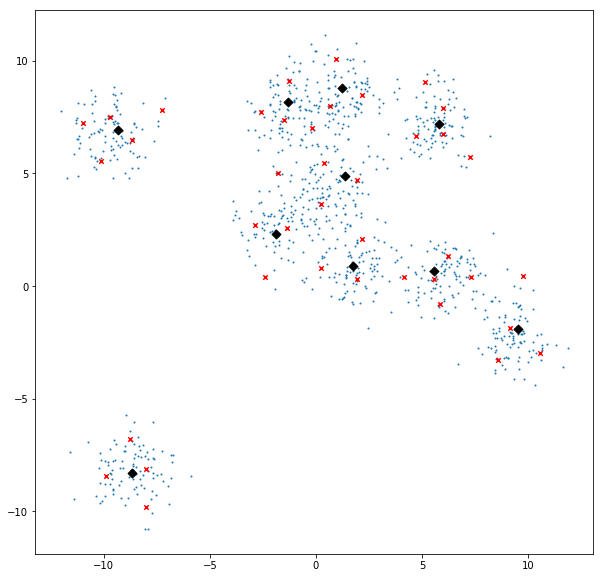

In [13]:
data, labels = make_blobs(1000, centers=10,random_state=0,shuffle=True)
plt.figure(figsize=(10,10))
plt.scatter(data[:,0],data[:,1],s=1)
plt.scatter(birch.subcluster_centers_[:,0],birch.subcluster_centers_[:,1],s=20,c='red',marker='x')
plt.scatter(b_knn.n_clusters.cluster_centers_[:,0],b_knn.n_clusters.cluster_centers_[:,1],s=40,c='black',marker='D')
plt.show()

### Exercise

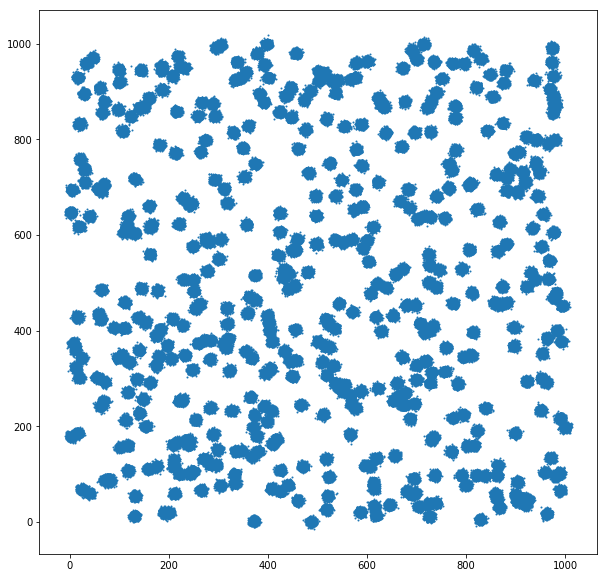

In [14]:
import itertools
from sklearn.datasets import make_blobs

N_CLUSTERS = 500

data, labels = make_blobs(1000000, centers=N_CLUSTERS,cluster_std=4,center_box=[0,1000],random_state=0,shuffle=True)
plt.figure(figsize=(10,10))
plt.scatter(data[:,0],data[:,1],s=1)
plt.show()

In [15]:
data_samled = data[np.random.choice(range(len(data)),1000,replace=False)]

In [16]:
distances = pairwise_distances(data_samled)

In [17]:
distances = np.round(distances,1)

In [18]:
np.sort(distances,axis=1)[:9,:9]

array([[ 0. ,  6.6,  9.5, 11.6, 11.7, 13.5, 14.3, 16.3, 23.9],
       [ 0. ,  5.1, 38.5, 44.6, 46.8, 48.7, 51.1, 56.8, 61.6],
       [ 0. ,  4.4,  5.2,  6.7,  7.3, 12.1, 15.2, 16.4, 21.6],
       [ 0. , 25.7, 52. , 55.5, 59.4, 65.4, 67.3, 72.4, 73.4],
       [ 0. , 26.5, 26.9, 38.9, 46.5, 47.1, 51.3, 58.3, 63.9],
       [ 0. , 36.9, 39.3, 40.2, 41.6, 43.7, 45. , 46.4, 48.2],
       [ 0. , 22.7, 26.5, 30.9, 34.4, 36.8, 37.2, 42.7, 49.1],
       [ 0. ,  5.5,  7.5,  7.7,  8.3,  9.5, 12.1, 13.9, 15.8],
       [ 0. ,  5.4,  6.3, 50.8, 62.5, 69.6, 70.6, 72.4, 79.1]])

In [19]:
bnn = Birch(threshold=10,n_clusters=KMeans(n_clusters=500))
bnn.fit(data)

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/cluster/birch.py:77: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  node1_dist, node2_dist = dist[[farthest_idx]]


Birch(branching_factor=50, compute_labels=True, copy=True,
   n_clusters=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=500, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0),
   threshold=10)

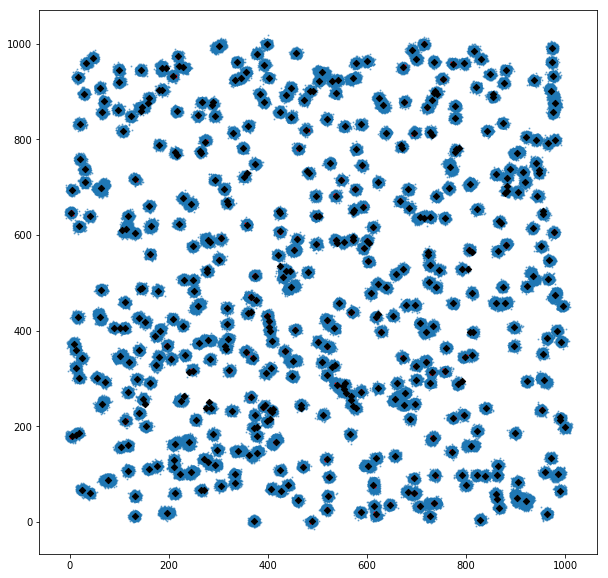

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(data[:,0],data[:,1],s=1,alpha=0.5)
plt.scatter(bnn.subcluster_centers_[:,0],bnn.subcluster_centers_[:,1],s=10,c='red',marker='x')
plt.scatter(bnn.n_clusters.cluster_centers_[:,0],bnn.n_clusters.cluster_centers_[:,1],s=20,c='black',marker='D')
plt.show()

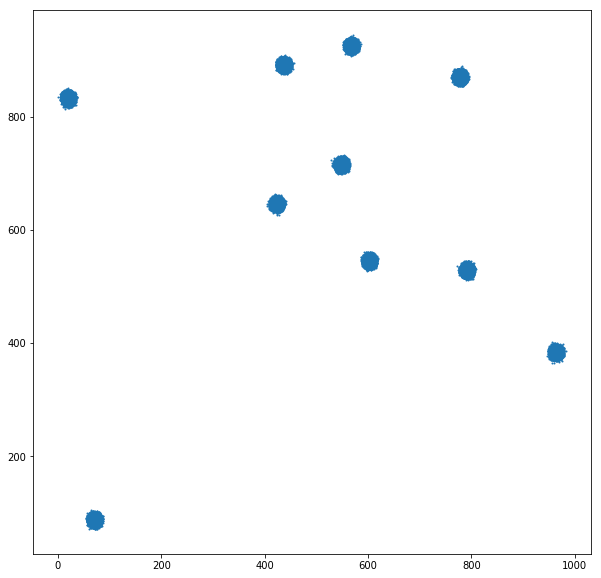

In [21]:
N_CLUSTERS = 10

data, labels = make_blobs(1000000, centers=N_CLUSTERS,cluster_std=4,center_box=[0,1000],random_state=0,shuffle=True)
plt.figure(figsize=(10,10))
plt.scatter(data[:,0],data[:,1],s=1)
plt.show()

In [22]:
bnn = Birch(threshold=5,n_clusters=KMeans(n_clusters=10))
bnn.fit(data)

Birch(branching_factor=50, compute_labels=True, copy=True,
   n_clusters=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0),
   threshold=5)

In [23]:
bnn.subcluster_centers_.shape

(34, 2)

In [24]:
bnn.n_clusters.cluster_centers_.shape

(10, 2)

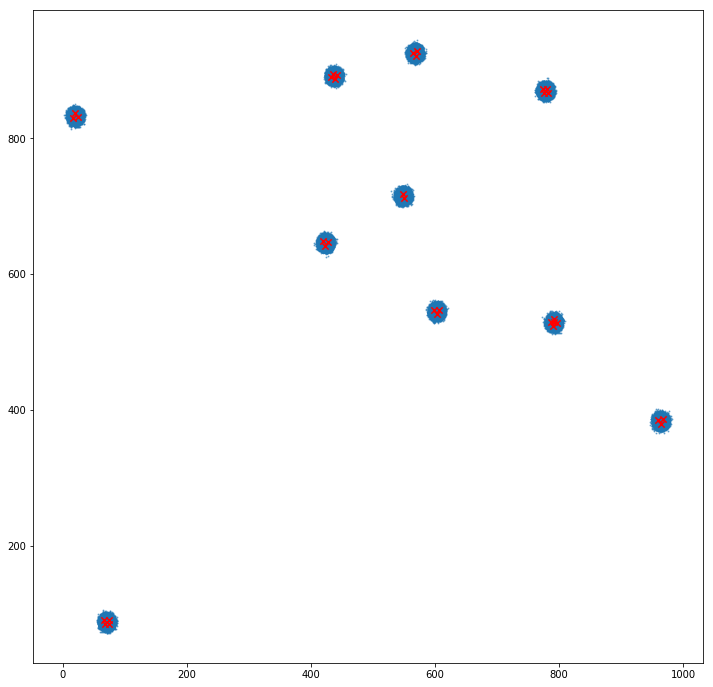

In [25]:
plt.figure(figsize=(12,12))
plt.scatter(data[:,0],data[:,1],s=1,alpha=0.5)
plt.scatter(bnn.subcluster_centers_[:,0],bnn.subcluster_centers_[:,1],s=40,c='red',marker='x')
#plt.scatter(bnn.n_clusters.cluster_centers_[:,0],bnn.n_clusters.cluster_centers_[:,1],s=20,c='black',marker='D')
plt.show()